In [113]:
!git clone https://github.com/uma7668/Cancer_Prediction.git

fatal: destination path 'Cancer_Prediction' already exists and is not an empty directory.


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import pickle

import warnings
warnings.filterwarnings('ignore')

In [115]:
df=pd.read_excel(r'/content/Cancer_Prediction/patient_data.xlsx')
df.head(20)

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair,Negative
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark,Positive
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,4,Patient 4,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN,Positive
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair,Negative
5,6,Patient 6,SI,Female,27.0,NO,19.0,10.0,1.95,NonVegetarian,Regular,5.466268,Brown,Negative
6,7,Patient 7,SI,Female,21.0,YES,28.0,6.0,2.76,NonVegetarian,Regular,4.035608,Dark,Positive
7,8,Patient 8,SI,Female,31.0,YES,18.0,8.0,0.93,NaN,Regular,5.616414,Wheatish,Positive
8,9,Patient 9,SI,Female,22.0,YES,22.0,7.0,1.38,Vegetarian,Regular,5.392144,Wheatish,Negative
9,10,Patient 10,NE,Male,41.0,NO,15.0,6.0,0.81,Vegetarian,Regular,4.307644,Fair,Negative


In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.isnull().sum()

,0
Sl.No,0
Patient #,17
Region,1
Gender,5
Age,2
Smokes,3
No of Ciggarets per day,1
No of Hrs Sleep per Day,1
No of Hrs Exercise per Day,2
Diet,6


<Axes: >

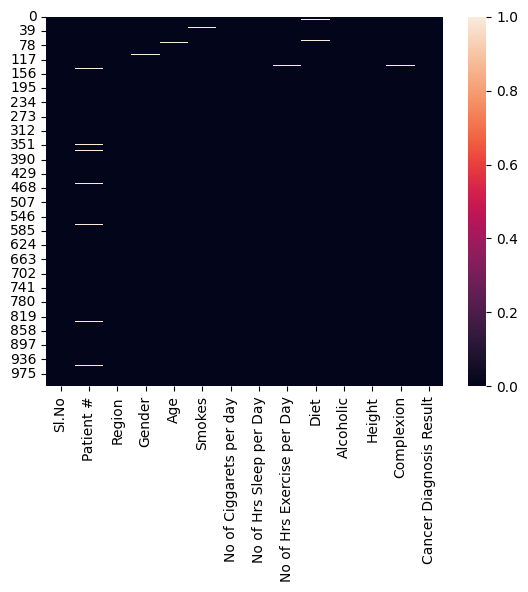

In [118]:
sns.heatmap(df.isnull())

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sl.No                       1010 non-null   int64  
 1   Patient #                   993 non-null    object 
 2   Region                      1009 non-null   object 
 3   Gender                      1005 non-null   object 
 4   Age                         1008 non-null   float64
 5   Smokes                      1007 non-null   object 
 6   No of Ciggarets per day     1009 non-null   float64
 7   No of Hrs Sleep per Day     1009 non-null   float64
 8   No of Hrs Exercise per Day  1008 non-null   object 
 9   Diet                        1004 non-null   object 
 10  Alcoholic                   1005 non-null   object 
 11  Height                      1007 non-null   float64
 12  Complexion                  1006 non-null   object 
 13  Cancer Diagnosis Result     1010 

In [120]:
df.drop(['Sl.No','Patient #','Region'],axis=1,inplace=True)

In [121]:
df['No of Hrs Exercise per Day'].unique()

array([2.6599999999999997, 1.27, 1.18, 2.7699999999999996, 1.55, 1.95,
       2.76, 0.93, 1.3800000000000001, 0.81, 2.2899999999999996,
       1.8800000000000001, 0.11, '2.32Hrs', 2.4, 0.72, 1.56, 3, 0.58,
       2.9099999999999997, 1.93, 1.79, 0.6, 0.13, 0.41000000000000003,
       1.78, 0.84, 2.0599999999999996, 1.99, 1.89, 1.28, 1.04, 0.52,
       2.3499999999999996, 0.3, 2.19, 0.04, 1.36, 2.3099999999999996,
       2.5399999999999996, 1.75, 0.33, 2.4299999999999997, 0.4, 1.42,
       2.51, 0.39, 2.5, 0.61, 0.97, 1.72, 1.57, 1.2, 1.94, 1.23, 1.82,
       0.48, 2.03, 0.54, 0.01, 2.8699999999999997, 2.65, 0.2,
       0.15000000000000002, 2.23, 2.9299999999999997, 2.8099999999999996,
       1.21, 1.59, 0.89, 1.47, 0.27, 1.37, 1.3, 0.64, 2.96, 1.07, 1.46,
       2.0399999999999996, 0.17, 0.74, 0.21000000000000002, 0.63, 2.15,
       1.26, 2.9, 1.65, 2.59, 2.6999999999999997, 1.76, '0.75Hrs', 1.77,
       1.29, 2.21, 0.22, 1.43, 2.94, 0.83, 2.92, 1.52, 2.2199999999999998,
       1.64, 2.

In [122]:
def convert_to_time_format(val):
  try:
    if isinstance(val, str):
      val = val.lower().replace('hr','').strip()
    hours = float(val)
    h = int(hours)
    m = int(round((hours -h) * 60))
    return f'{h} {m}m'
  except:
    return np.nan
converted_times = [convert_to_time_format(x) for x in df['No of Hrs Exercise per Day']]
df['No of Hrs Exercise per Day'] = converted_times

In [123]:
df['No of Hrs Exercise per Day'].unique()

array(['2 40m', '1 16m', '1 11m', '2 46m', '1 33m', '1 57m', '0 56m',
       '1 23m', '0 49m', '2 17m', '1 53m', '0 7m', nan, '2 24m', '0 43m',
       '1 34m', '3 0m', '0 35m', '2 55m', '1 56m', '1 47m', '0 36m',
       '0 8m', '0 25m', '0 50m', '2 4m', '1 59m', '1 17m', '1 2m',
       '0 31m', '2 21m', '0 18m', '2 11m', '0 2m', '1 22m', '2 19m',
       '2 32m', '1 45m', '0 20m', '2 26m', '0 24m', '1 25m', '2 31m',
       '0 23m', '2 30m', '0 37m', '0 58m', '1 43m', '1 12m', '1 14m',
       '1 49m', '0 29m', '2 2m', '0 32m', '0 1m', '2 52m', '2 39m',
       '0 12m', '0 9m', '2 14m', '2 56m', '2 49m', '1 13m', '1 35m',
       '0 53m', '1 28m', '0 16m', '1 18m', '0 38m', '2 58m', '1 4m',
       '0 10m', '0 44m', '0 13m', '2 9m', '2 54m', '1 39m', '2 35m',
       '2 42m', '1 46m', '2 13m', '1 26m', '1 31m', '1 38m', '0 26m',
       '2 16m', '2 57m', '1 32m', '2 28m', '2 33m', '1 5m', '2 12m',
       '2 25m', '1 24m', '0 46m', '0 5m', '2 53m', '1 52m', '1 36m',
       '0 41m', '0 33m', '1 

In [124]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1008.0,39.06,14.18,4.0,29.00,38.50,49.00,222.0
No of Ciggarets per day,1009.0,15.67,8.58,1.0,8.00,15.00,23.00,30.0
No of Hrs Sleep per Day,1009.0,7.97,1.41,6.0,7.00,8.00,9.00,10.0
Height,1007.0,5.02,0.58,4.0,4.52,5.02,5.53,6.0


In [125]:
df.isna().sum()

,0
Gender,5
Age,2
Smokes,3
No of Ciggarets per day,1
No of Hrs Sleep per Day,1
No of Hrs Exercise per Day,6
Diet,6
Alcoholic,5
Height,3
Complexion,4


In [126]:
for col in df.columns:
  if df[col].isna().any():
    df[col].fillna(df[col].mode().iloc[0],inplace=True)

In [127]:
df.isna().sum()

,0
Gender,0
Age,0
Smokes,0
No of Ciggarets per day,0
No of Hrs Sleep per Day,0
No of Hrs Exercise per Day,0
Diet,0
Alcoholic,0
Height,0
Complexion,0


In [128]:
df.head(20)

,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,Male,24.0,NO,15.0,8.0,2 40m,Vegetarian,Occasional,5.687164,Fair,Negative
1,Male,32.0,YES,27.0,9.0,1 16m,NonVegetarian,Regular,4.071704,Dark,Positive
2,Male,28.0,YES,29.0,10.0,1 11m,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,Female,33.0,NO,11.0,7.0,2 46m,Vegetarian,Regular,5.165676,Brown,Positive
4,Female,58.0,NO,21.0,9.0,1 33m,Vegetarian,Regular,5.636116,Fair,Negative
5,Female,27.0,NO,19.0,10.0,1 57m,NonVegetarian,Regular,5.466268,Brown,Negative
6,Female,21.0,YES,28.0,6.0,2 46m,NonVegetarian,Regular,4.035608,Dark,Positive
7,Female,31.0,YES,18.0,8.0,0 56m,Vegetarian,Regular,5.616414,Wheatish,Positive
8,Female,22.0,YES,22.0,7.0,1 23m,Vegetarian,Regular,5.392144,Wheatish,Negative
9,Male,41.0,NO,15.0,6.0,0 49m,Vegetarian,Regular,4.307644,Fair,Negative


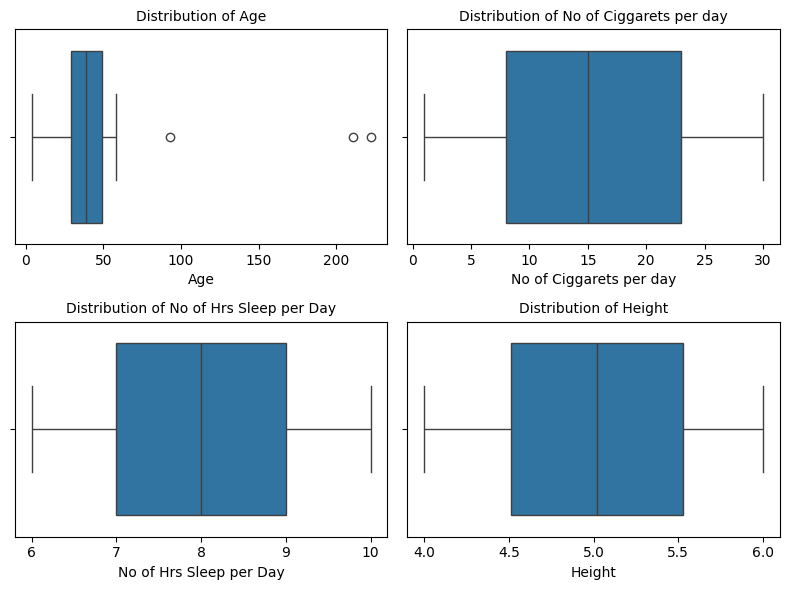

In [129]:
num_cols = ['Age','No of Ciggarets per day','No of Hrs Sleep per Day', 'Height' ]
plt.figure(figsize=(8,6))
for i,col in enumerate(num_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Distribution of {col}',size=10)
  plt.tight_layout()

In [130]:
df=df[df['Age'] <= 100]

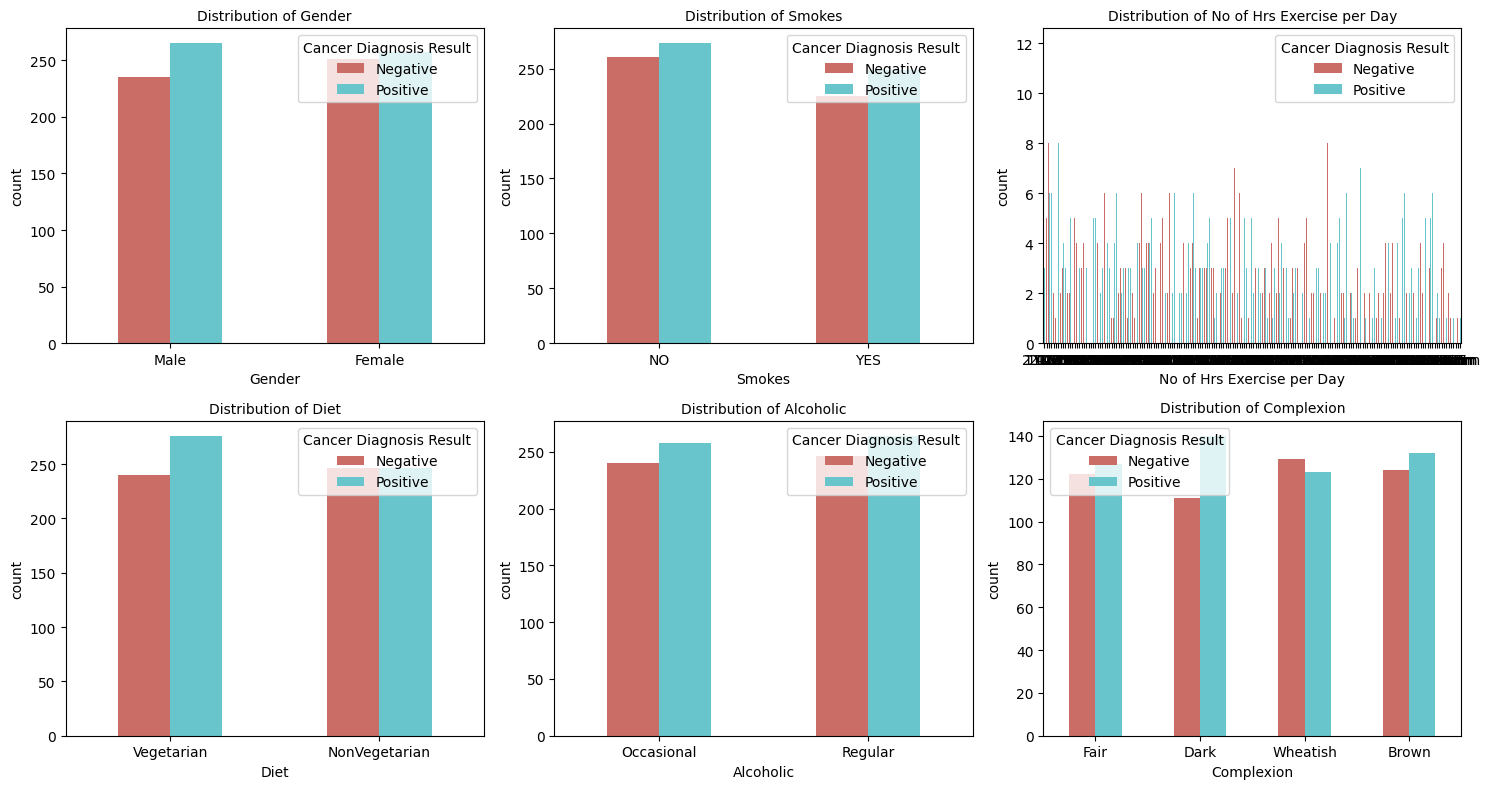

In [131]:
cat_cols = ['Gender','Smokes', 'No of Hrs Exercise per Day','Diet',	'Alcoholic','Complexion']
plt.figure(figsize=(15,8))
for i,col in enumerate(cat_cols):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[col],data=df,hue='Cancer Diagnosis Result',width=0.5,palette='hls')
  plt.title(f'Distribution of {col}',size=10)
  plt.tight_layout()

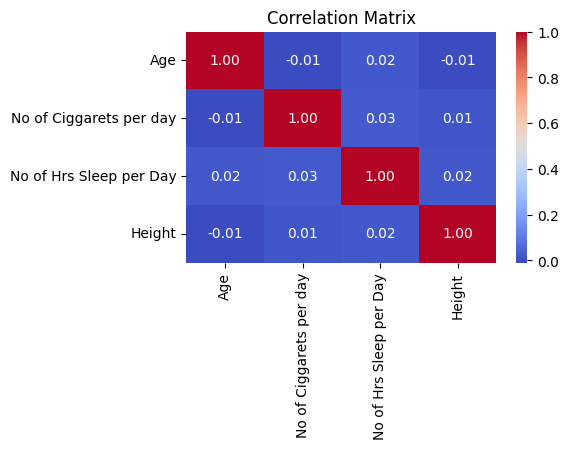

In [132]:
plt.figure(figsize=(5,3))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [133]:
df.describe()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,Height
count,1008.000000,1008.000000,1008.000000,1008.000000
mean,38.731151,15.649802,7.971230,5.016954
std,11.773691,8.571643,1.412164,0.579829
min,4.000000,1.000000,6.000000,4.000218
25%,29.000000,8.000000,7.000000,4.514420
50%,38.500000,15.000000,8.000000,5.019450
75%,49.000000,23.000000,9.000000,5.526541
max,93.000000,30.000000,10.000000,5.999900


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1008 non-null   object 
 1   Age                         1008 non-null   float64
 2   Smokes                      1008 non-null   object 
 3   No of Ciggarets per day     1008 non-null   float64
 4   No of Hrs Sleep per Day     1008 non-null   float64
 5   No of Hrs Exercise per Day  1008 non-null   object 
 6   Diet                        1008 non-null   object 
 7   Alcoholic                   1008 non-null   object 
 8   Height                      1008 non-null   float64
 9   Complexion                  1008 non-null   object 
 10  Cancer Diagnosis Result     1008 non-null   object 
dtypes: float64(4), object(7)
memory usage: 94.5+ KB


In [135]:
df.columns

Index(['Gender', 'Age', 'Smokes', 'No of Ciggarets per day',
       'No of Hrs Sleep per Day', 'No of Hrs Exercise per Day', 'Diet',
       'Alcoholic', 'Height', 'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')

In [136]:
obj_cols=df.select_dtypes(include='object').columns
print(obj_cols)

Index(['Gender', 'Smokes', 'No of Hrs Exercise per Day', 'Diet', 'Alcoholic',
       'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')


In [137]:
df.head()

,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,Male,24.0,NO,15.0,8.0,2 40m,Vegetarian,Occasional,5.687164,Fair,Negative
1,Male,32.0,YES,27.0,9.0,1 16m,NonVegetarian,Regular,4.071704,Dark,Positive
2,Male,28.0,YES,29.0,10.0,1 11m,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,Female,33.0,NO,11.0,7.0,2 46m,Vegetarian,Regular,5.165676,Brown,Positive
4,Female,58.0,NO,21.0,9.0,1 33m,Vegetarian,Regular,5.636116,Fair,Negative


In [138]:
X=df.drop('Cancer Diagnosis Result',axis=1)
y=df['Cancer Diagnosis Result'].replace({'Positive' :1, 'Negative' : 0})

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

cat_cols = ['Gender', 'Smokes', 'No of Hrs Exercise per Day', 'Diet', 'Alcoholic', 'Complexion']
num_cols = ['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day', 'Height']

preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),num_cols),
                                               ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)])


In [140]:
y_train.value_counts()

,count
Cancer Diagnosis Result,
1,416
0,390


In [141]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Example model
log_reg = LogisticRegression()

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression()}

trained_models = {}

# Training each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f'{name} trained successfully')


Logistic Regression trained successfully


In [142]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score,f1_score,recall_score

results = []

for name, model in models.items():
  pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  results.append({'Model': name,
                  'Accuracy': accuracy,
                  'Precision': precision,
                  'F1 Score':f1,
                  'Recall': recall})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy',ascending=False, ignore_index=True)

# Print the results
print(results_df)


                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.584158   0.598214  0.614679  0.632075


In [143]:
#saving the trained model with pickle file

model_data = {'model':trained_models['Logistic Regression'], 'features_names':X.columns.tolist()}

with open('cancer_prediction.pkl','wb') as f:
  pickle.dump(model_data,f)

In [144]:
#load the saved model and the feature names

with open('cancer_prediction.pkl','rb') as f:
  model_data = pickle.load(f)

loaded_model = model_data['model']
feature_names = model_data['features_names']

In [145]:
print(feature_names)

['Gender', 'Age', 'Smokes', 'No of Ciggarets per day', 'No of Hrs Sleep per Day', 'No of Hrs Exercise per Day', 'Diet', 'Alcoholic', 'Height', 'Complexion']


In [146]:
input_data = {
    'Gender': 'Male',
    'Age': 29,
    'Smokes': 'No',
    'No of Ciggarets per day': 0,
    'No of Hrs Sleep per Day': 9,
    'No of Hrs Exercise per Day': '1 0m',
    'Diet': 'Vegetarian',
    'Alcoholic': 'Occasional',
    'Height': 5.6,
    'Complexion': 'Brown'
}

input_data_df = pd.DataFrame([input_data])

#making a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

print(f"Prediction :{'Positive' if prediction[0]==1 else 'Negative'}")
print(f'Prediction Probability:{pred_prob * 100}')

[0]
Prediction :Negative
Prediction Probability:[[50.5106193 49.4893807]]


In [147]:
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))